# Twitter Analysis

In this notebook we will analyse about 3000 tweets twittered by Donald Trump, the current president of the united states.

### Question: Which topics where most tweeted about by Donald Trump?

In [1]:
# Load the "autoreload" extension
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import datetime
%matplotlib inline
#%matplotlib notebook
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)

# self written packages
from data import data_utils
from data.preprocessing import preprocess
from data.preprocessing import remove_stopwords

### Read files from directory of processed data tables

In [2]:
file_name = "realDonaldTrump_tweets.csv"
data_dir = os.path.join(data_utils.get_data_dir(),"processed", file_name)
data = pd.read_csv(data_dir, sep=";", infer_datetime_format=True)
data.head(5)

,id_str,created_at,full_text,favorite_count,retweet_count,retweeted
0,953000902331453442,2018-01-15 20:28:15,senator dicky durbin totally misrepresented wh...,9898,3043,0
1,952933691642339329,2018-01-15 16:01:11,dr king s dream is our dream it is the america...,0,11421,1
2,952888691944550401,2018-01-15 13:02:22,to stop drugs they want to take money away fro...,79559,17328,0
3,952887520790040576,2018-01-15 12:57:43,statement by me last night in florida honestly...,65684,15890,0
4,952540700683497472,2018-01-14 13:59:35,big unnecessary regulation cuts made it all po...,76061,17115,0


In [3]:
print("We gathered {} tweets.".format(data.shape[0]))

We gathered 3203 tweets.


### One example tweet: 

In [4]:
data.head(1)["full_text"][0]

'senator dicky durbin totally misrepresented what was said at the daca meeting deals can t get made when there is no trust durbin blew daca and is hurting our military'

### There are still a lot of stopwords in the data which should be removed:

In [5]:
data["words_only"] = remove_stopwords(data["full_text"])

In [6]:
data.head(1)["words_only"][0]

'senator,dicky,durbin,totally,misrepresented,said,daca,meeting,deals,get,made,trust,durbin,blew,daca,hurting,military'

### Distribution of tweets over time

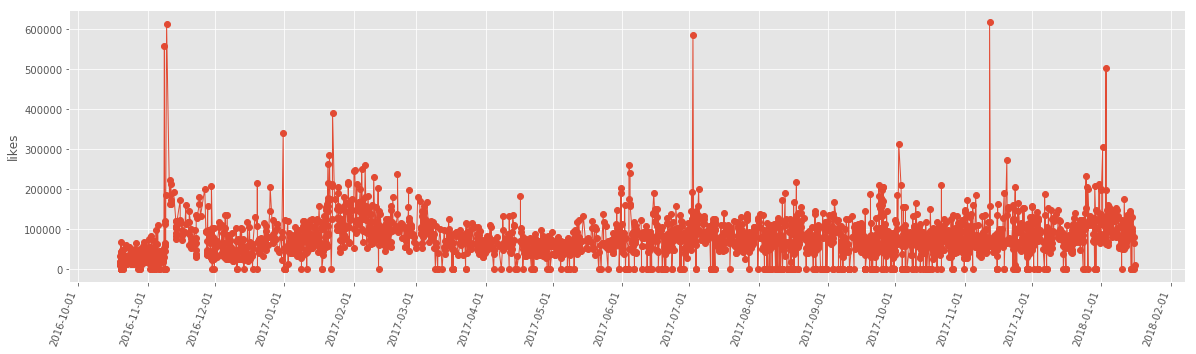

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70, horizontalalignment='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.plot_date(data["created_at"], data["favorite_count"], "-o",lw=1)
plt.ylabel("likes")
plt.show();

In [8]:
index_mask = list(data[data.favorite_count > 400000].index)
display(data.iloc[index_mask])
print("Tweets in detail:\n")
for row in data.loc[index_mask,"full_text"]:
    print(row)
    print("\n")

,id_str,created_at,full_text,favorite_count,retweet_count,retweeted,words_only
94,948355557022420992,2018-01-03 00:49:19,north korean leader kim jong un just stated th...,501885,194426,0,"north,korean,leader,kim,jong,un,stated,nuclear..."
448,929511061954297857,2017-11-12 00:48:01,why would kim jong un insult me by calling me ...,617466,271553,0,"would,kim,jong,un,insult,calling,old,would,nev..."
1620,881503147168071680,2017-07-02 13:21:42,fraudnewscnn fnn,586486,361642,0,"fraudnewscnn,fnn"
2864,796315640307060738,2016-11-09 11:36:58,such a beautiful and important evening the for...,613222,211232,0,"beautiful,important,evening,forgotten,man,woma..."
2876,795954831718498305,2016-11-08 11:43:14,today we make america great again,557279,331035,0,"today,make,america,great"


Tweets in detail:

north korean leader kim jong un just stated that the nuclear button is on his desk at all times will someone from his depleted and food starved regime please inform him that i too have a nuclear button but it is a much bigger amp more powerful one than his and my button works


why would kim jong un insult me by calling me old when i would never call him short and fat oh well i try so hard to be his friend and maybe someday that will happen


fraudnewscnn fnn


such a beautiful and important evening the forgotten man and woman will never be forgotten again we will all come together as never before


today we make america great again


